HW4 Мельчук А.Б.

### Тема “Классификация текста”

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

Задание 1.
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

Задание 2.
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

Задание 3.
Выведите результаты f1-score всех моделей, сделайте вывод.

Задание 4.
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

Задание 5.
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

Задание 6.
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, xgboost, numpy, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
!gpustat

HIVE                 Sat Sep 12 04:26:45 2020  440.100
[0] GeForce GTX 1080 | 60'C,   2 % |   568 /  8118 MB | gdm(78M) ai(225M) ai(199M) ai(53M)


In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
combine_df = pd.read_pickle('combine_df.pkl')
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [17]:
def tokenizer(text):
    return text

In [18]:
count_vectorizer = CountVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False, max_df=0.9,max_features = 1000)

# Создаем the Bag-of-Words модель
count_bag_of_words = count_vectorizer.fit_transform(combine_df['tweet_stemmed'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(count_bag_of_words.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
count_vectorizer_lem = CountVectorizer(tokenizer=tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9,max_features = 1000)

# Создаем the Bag-of-Words модель
count_bag_of_words_lem = count_vectorizer_lem.fit_transform(combine_df['tweet_lemmatized'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer_lem.get_feature_names()
pd.DataFrame(count_bag_of_words_lem.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adult,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False, max_df=0.9,max_features = 1000)

# Создаем the Bag-of-Words модель
bag_of_words_tfidf = tfidf_vectorizer.fit_transform(combine_df['tweet_stemmed'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words_tfidf.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
tfidf_vectorizer_lem = TfidfVectorizer(tokenizer=tokenizer, stop_words='english',
                                   lowercase=False, max_df=0.9,max_features = 1000)

# Создаем the Bag-of-Words модель
bag_of_words_tfidf_lem = tfidf_vectorizer_lem.fit_transform(combine_df['tweet_lemmatized'].tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = tfidf_vectorizer_lem.get_feature_names()
pd.DataFrame(bag_of_words_tfidf_lem.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adult,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def train_model(classifier, feature_vector_train, label):
    classifier.fit(feature_vector_train, label)
    
    predictions_proba = classifier.predict_proba(feature_vector_train)
    predictions = (predictions_proba >= 0.3)[:,1].astype(int)
    
    
    return metrics.accuracy_score(predictions, label)

In [25]:
train_model(linear_model.LogisticRegression(), count_bag_of_words[:31962], combine_df[:31962]['label'])

0.9530379826043427

In [26]:
train_model(linear_model.LogisticRegression(), count_bag_of_words_lem[:31962], combine_df[:31962]['label'])

0.9517552093110568

In [28]:
train_model(linear_model.LogisticRegression(), bag_of_words_tfidf[:31962], combine_df[:31962]['label'])

0.952850259683374

In [27]:
train_model(linear_model.LogisticRegression(), bag_of_words_tfidf_lem[:31962], combine_df[:31962]['label'])

0.9509730304736875

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stops = set(stopwords.words('english'))

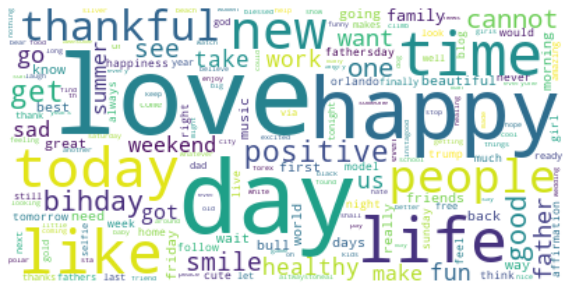

In [31]:
import collections

words = []
for line in combine_df['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

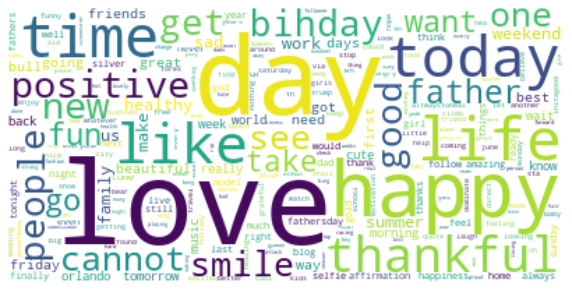

In [32]:
words = []
for line in combine_df.loc[combine_df['label'] == 0]['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

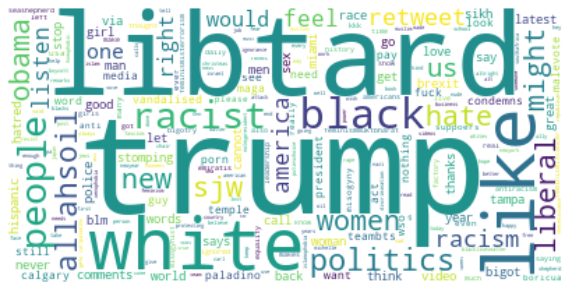

In [33]:
words = []
for line in combine_df.loc[combine_df['label'] == 1]['tweet']: 
    line_words = line.split()
    words.extend([x for x in line_words if x not in stops])

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()